# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc

from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

In [45]:
RANDOM_STATE = 42

In [36]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None, index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,,,,,,,,,,,,,,,,,,
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [37]:
dataset.dtypes

1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
17     int64
18     int64
19    object
dtype: object

In [46]:
data = dataset.loc[:, dataset.columns.drop(19)].values
target = dataset[19].values
print(data.shape, target.shape)

(846, 18) (846,)


In [81]:
np.unique(target)

array(['bus', 'opel', 'saab', 'van'], dtype=object)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=RANDOM_STATE)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(676, 18) (676,) (170, 18) (170,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [48]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,90,47,85,161,64,10,163,42,20,160,177,389,185,73,9,0,185,195
1,102,52,101,213,64,10,203,33,23,157,214,616,186,65,0,19,193,203
2,105,53,108,206,63,12,222,31,25,168,226,712,201,71,15,35,189,203
3,115,52,100,203,62,10,217,31,24,165,229,697,214,72,14,4,188,197
4,109,55,96,191,57,6,241,28,26,170,267,857,242,85,8,9,184,184
5,91,35,66,159,59,7,147,45,19,131,169,322,123,64,1,1,197,203
6,98,58,101,208,65,12,226,30,25,182,225,748,216,71,6,1,185,196
7,96,37,74,187,68,8,159,42,20,134,183,378,134,69,3,16,190,197
8,88,35,60,143,59,7,128,52,18,129,147,246,109,62,1,6,202,209
9,86,38,76,143,59,8,142,47,18,131,167,301,138,71,5,10,189,196


Methods `describe` and `info` deliver some useful information.

In [49]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,93.664201,44.843195,82.137574,169.628698,61.945266,8.729290,168.467456,41.000000,20.542899,147.939349,188.174556,437.455621,174.261834,72.328402,6.431953,12.828402,189.063609,195.923077
std,8.273901,6.214604,15.653385,34.128337,8.347186,5.029905,32.665222,7.749982,2.535600,14.747380,30.951369,172.892746,32.367763,7.730181,4.969517,8.947923,6.299943,7.416298
min,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,167.000000,319.000000,148.750000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.000000,196.000000,65.000000,10.000000,197.250000,46.000000,23.000000,160.000000,217.000000,584.500000,198.000000,75.000000,9.000000,19.000000,193.250000,201.000000
max,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [50]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       676 non-null    int64
 1   1       676 non-null    int64
 2   2       676 non-null    int64
 3   3       676 non-null    int64
 4   4       676 non-null    int64
 5   5       676 non-null    int64
 6   6       676 non-null    int64
 7   7       676 non-null    int64
 8   8       676 non-null    int64
 9   9       676 non-null    int64
 10  10      676 non-null    int64
 11  11      676 non-null    int64
 12  12      676 non-null    int64
 13  13      676 non-null    int64
 14  14      676 non-null    int64
 15  15      676 non-null    int64
 16  16      676 non-null    int64
 17  17      676 non-null    int64
dtypes: int64(18)
memory usage: 95.2 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

##### 2.0.1. Remove strongly correlated features
Because we want to use logistic regression (which based on linear regression, we remember about some problems that gives us the correlated features - can cause overfitting and instability). So, let's check the correlation of features.

Text(0.5, 1.0, 'Correlation')

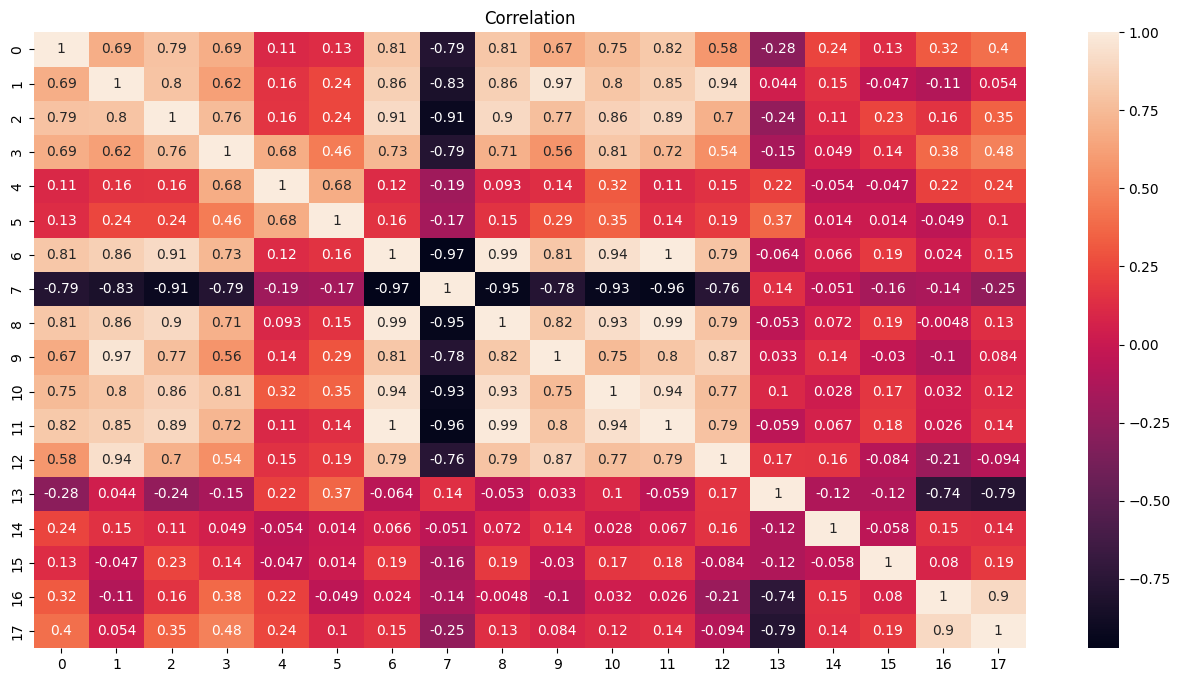

In [53]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

Let's choose the most correlated features and drop them from our dataset.

In [54]:
threshold = 0.95

corr_matrix = pd.DataFrame(X_train).corr().abs()
upper_tr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
dropped = [column for column in upper_tr.columns if any(upper_tr[column] > threshold)]

X_train = pd.DataFrame(X_train).drop(dropped, axis=1, inplace=False)
X_test = pd.DataFrame(X_test).drop(dropped, axis=1, inplace=False)

In [55]:
dropped

[7, 8, 9, 11]

Text(0.5, 1.0, 'Correlation')

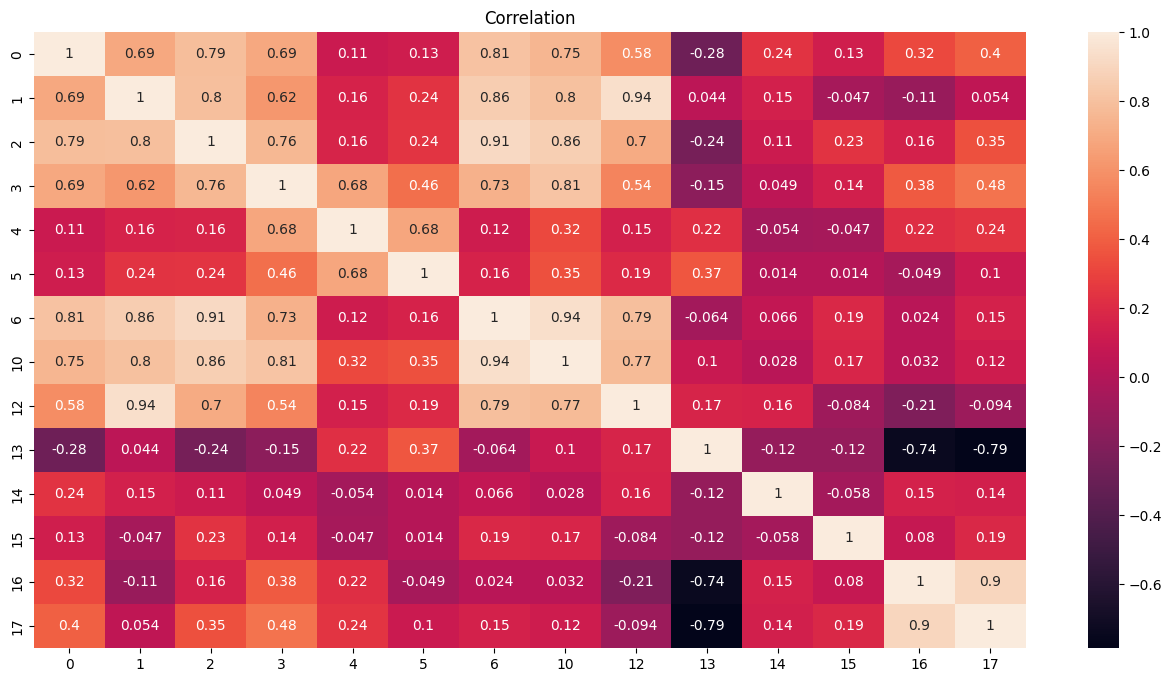

In [56]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

##### 2.0.2. Removing outliers
Below we will use logistic regression with MSE, so MSE is quite sensitive about outliers. To get better classifier we need to drop outliers.

In [59]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [60]:
# create mask
mask = yhat != -1

In [61]:
# remove all rows that are outliers
X_train, y_train = X_train.to_numpy()[mask, :], y_train[mask]

In [62]:
(X_train.shape, y_train.shape)

((662, 14), (662,))

##### 2.0.3. Normalization
Because we will be using logistic regression classificator, we need to normalize our dataset (in order to avoid gradient explosion).

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02,6.620000e+02
mean,-3.300482e-16,8.049955e-17,1.609991e-17,3.810312e-16,-2.307654e-16,-2.307654e-16,1.126994e-16,3.058983e-16,3.622480e-17,1.057227e-15,1.073327e-17,-3.488314e-17,-8.130455e-16,-3.126066e-16
std,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00,1.000756e+00
min,-2.516948e+00,-1.901975e+00,-2.558790e+00,-2.002298e+00,-2.547742e+00,-2.672168e+00,-1.692958e+00,-1.913625e+00,-2.031170e+00,-2.036900e+00,-1.290950e+00,-1.427804e+00,-2.094360e+00,-2.050633e+00
25%,-8.062503e-01,-7.670598e-01,-7.669603e-01,-8.458933e-01,-7.656149e-01,-5.403590e-01,-6.561684e-01,-6.768317e-01,-8.022149e-01,-7.604332e-01,-8.898192e-01,-7.598140e-01,-6.643579e-01,-6.909385e-01
50%,-7.309412e-02,-1.185367e-01,-1.910151e-01,-6.453849e-02,-5.276390e-02,-1.139971e-01,-3.419897e-01,-3.161004e-01,-1.442302e-02,-1.221996e-01,-8.755797e-02,-2.031552e-01,-2.880165e-02,1.248783e-01
75%,6.600621e-01,6.921171e-01,1.024869e+00,8.105789e-01,6.600871e-01,7.387267e-01,9.147251e-01,1.006581e+00,7.418572e-01,5.160341e-01,5.141380e-01,6.874988e-01,7.656437e-01,6.687562e-01
max,3.103916e+00,2.313425e+00,1.792796e+00,2.060747e+00,2.442215e+00,7.134155e+00,2.799797e+00,3.033547e+00,2.979186e+00,2.909410e+00,3.121487e+00,3.136797e+00,2.672313e+00,2.028451e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [68]:
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [70]:
param_grid = {
    'class_weight' : ['balanced', None],
    'penalty' : ['l1', 'l2', None, 'elasticnet'],
    'C' : [0.01, 0.1, 1.0, 10, 100]
}
grid_cv = GridSearchCV(logreg, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=10, refit=False)
grid_cv.fit(X_train, y_train)

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting pena

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', None, 'elasticnet']},
             refit=False, scoring=['accuracy', 'f1_weighted'])

In [74]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

33 33


In [75]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.788511985526911 0.7858912621269671


In [76]:
best_params_lr = grid_cv.cv_results_['params'][best_acc_idx]
logreg.set_params(**best_params_lr)

LogisticRegression(C=100, class_weight='balanced', max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001)

In [77]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)

In [103]:
name_classes = np.unique(target)
print(name_classes)
n_classes = len(name_classes)
y_test_bin = label_binarize(y_test, classes=name_classes)

['bus' 'opel' 'saab' 'van']


In [121]:
def plot_roc_curve(y_test, y_pred, n_classes):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'red']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(name_classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

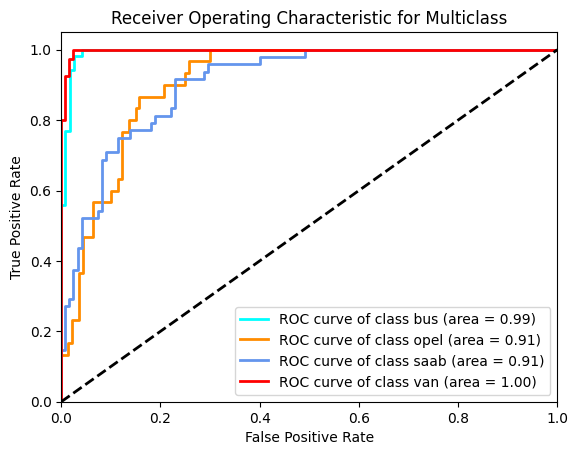

In [122]:
plot_roc_curve(y_test_bin, y_pred, n_classes)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [105]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((662, 14), (662,), (170, 14), (170,))

Use our pre-processed data in PCA

In [106]:
np.var(np.concatenate((X_train, X_test), axis=0))

1.0026206897860959

In [108]:
pca = PCA()
pca.fit_transform(X_train)

array([[ 0.04559495,  0.68993386, -1.46616152, ..., -0.106603  ,
         0.10378422,  0.02887481],
       [-3.18007145, -0.68705219,  1.26087203, ...,  0.20675308,
        -0.22362582, -0.00744807],
       [-4.18675084,  0.26563969,  0.95278485, ..., -0.13082926,
         0.01395109,  0.02316503],
       ...,
       [ 2.22604786,  1.83250992, -1.11532082, ...,  0.14540949,
         0.28011047,  0.04453614],
       [ 2.55188708, -2.59105419,  0.50621522, ...,  0.00664685,
         0.03009912, -0.00870826],
       [ 1.52418958, -1.19301415, -1.89120028, ...,  0.2444187 ,
         0.08723755, -0.10367638]])

Text(0, 0.5, 'explained variance ration')

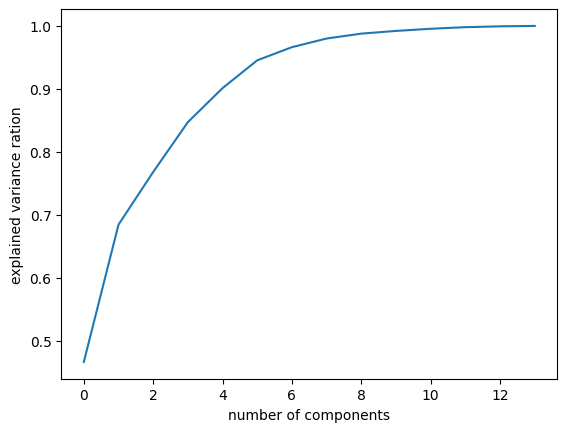

In [109]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ration')

In [112]:
X_train.shape[1]

14

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Normalizing data is very important in PCA.  
As we can see from graph above, we need to use 10 principal components to get best result.

In [113]:
pca = PCA(n_components=10)
pca.fit_transform(X_train).shape

(662, 10)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [115]:
pca = PCA(n_components=10)
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
estimators = [('pca', pca), ('log_reg', log_reg)]
pipeline = Pipeline(estimators)
pipeline

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('log_reg',
                 LogisticRegression(multi_class='multinomial', solver='saga',
                                    tol=0.001))])

In [116]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'log_reg__class_weight' : ['balanced', None],
    'log_reg__penalty' : ['l1', 'l2', None, 'elasticnet'],
    'log_reg__C' : [0.01, 0.1, 1.0, 10, 100]
}
grid_cv = GridSearchCV(pipeline, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=10, refit=False)
grid_cv.fit(X_train, y_train)

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(n_components=10)),
                                       ('log_reg',
                                        LogisticRegression(multi_class='multinomial',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'log_reg__C': [0.01, 0.1, 1.0, 10, 100],
                         'log_reg__class_weight': ['balanced', None],
                         'log_reg__penalty': ['l1', 'l2', None, 'elasticnet']},
             refit=False, scoring=['accuracy', 'f1_weighted'])

In [38]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.7273960804540472 accuracy: 0.7350986500519211 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'l1'}
f1_weighted: 0.725200784016558 accuracy: 0.7331429560401522 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'l2'}
f1_weighted: 0.7312306034889063 accuracy: 0.7350813430252682 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': None}
f1_weighted: nan accuracy: nan 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'elasticnet'}
f1_weighted: 0.7302379737953167 accuracy: 0.7388369678089305 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': None, 'log_reg__penalty': 'l1'}
f1_weighted: 0.7223220281685127 accuracy: 0.7312737971616475 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': None, 'log_reg__penalty': 'l2'}
f1_weighted: 0.7303973174679054 accuracy: 0.7350813430252683 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': No

In [117]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

17 29


In [118]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.7190863862505654 0.7145578335124256


In [119]:
best_params_lr = grid_cv.cv_results_['params'][best_acc_idx]
pipeline.set_params(**best_params_lr)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('log_reg',
                 LogisticRegression(class_weight='balanced',
                                    multi_class='multinomial', solver='saga',
                                    tol=0.001))])

In [120]:
pipeline.fit(X_train, y_train)
predicted_test = pipeline.predict_proba(X_test)

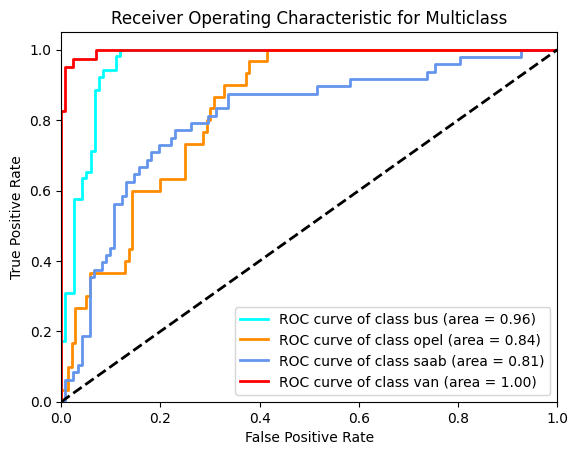

In [123]:
plot_roc_curve(y_test_bin, predicted_test, n_classes)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Since we use desicion tree as classifier, we don't need to normalize, remove correlated features, drop outliers and PCA. Because decision tree analysing features independent at each node.

So, we only need to delete first (index) columns from dataset.

In [124]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(data, target, test_size=0.2, random_state=RANDOM_STATE)
print(X_train_dt.shape, y_train_dt.shape, X_test_dt.shape, y_test_dt.shape)

(676, 18) (676,) (170, 18) (170,)


In [125]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_grid = [
  {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, None]}
]
grid_cv = GridSearchCV(dtc, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=5, refit=False)
grid_cv.fit(X_train_dt, y_train_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30,
                                        None]}],
             refit=False, scoring=['accuracy', 'f1_weighted'])

In [126]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.45131684238364056 accuracy: 0.5251416122004358 
params: {'max_depth': 2}
f1_weighted: 0.6079649938568789 accuracy: 0.6449455337690632 
params: {'max_depth': 3}
f1_weighted: 0.6646067700426947 accuracy: 0.6849128540305012 
params: {'max_depth': 4}
f1_weighted: 0.7044519225932476 accuracy: 0.7130283224400872 
params: {'max_depth': 5}
f1_weighted: 0.6769071127555257 accuracy: 0.6818954248366014 
params: {'max_depth': 6}
f1_weighted: 0.6851623149183799 accuracy: 0.6907952069716776 
params: {'max_depth': 7}
f1_weighted: 0.6858672698302968 accuracy: 0.6892483660130718 
params: {'max_depth': 8}
f1_weighted: 0.6974278975908623 accuracy: 0.7025925925925925 
params: {'max_depth': 9}
f1_weighted: 0.6841481085802913 accuracy: 0.687843137254902 
params: {'max_depth': 10}
f1_weighted: 0.69957812558711 accuracy: 0.7011220043572985 
params: {'max_depth': 15}
f1_weighted: 0.702340455355615 accuracy: 0.7041503267973857 
params: {'max_depth': 20}
f1_weighted: 0.7061186583290826 accuracy: 0

In [127]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

3 11


In [128]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.7130283224400872 0.7061186583290826


In [129]:
best_params_dt = grid_cv.cv_results_['params'][best_acc_idx]
dtc.set_params(**best_params_dt)

DecisionTreeClassifier(max_depth=5)

In [130]:
dtc.fit(X_train_dt, y_train_dt)
predicted_test = dtc.predict_proba(X_test_dt)

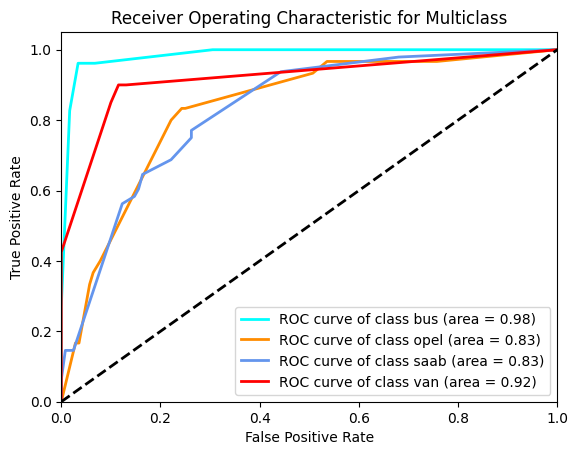

In [132]:
plot_roc_curve(label_binarize(y_test_dt, classes=name_classes), predicted_test, n_classes)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [133]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = X_train, X_test, y_train, y_test  # fully preprocessed data for log_reg

In [134]:
print(f"shapes of data for log_reg: X_train - {X_train_lr.shape}, X_test - {X_test_lr.shape}, y_train - {y_train_lr.shape}, y_test - {y_test_lr.shape},")
print(f"shapes of data for dec_tree: X_train - {X_train_dt.shape}, X_test - {X_test_dt.shape}, y_train - {y_train_dt.shape}, y_test - {y_test_dt.shape},")

shapes of data for log_reg: X_train - (662, 14), X_test - (170, 14), y_train - (662,), y_test - (170,),
shapes of data for dec_tree: X_train - (676, 18), X_test - (170, 18), y_train - (676,), y_test - (170,),


In [135]:
print("optimal hyperparameters for log_reg: C=10, max_iter=500, multi_class='multinomial', penalty='l1', solver='saga', tol=0.001")
print(f"optimal hyperparameters for dec_tree {best_params_dt}")

optimal hyperparameters for log_reg: C=10, max_iter=500, multi_class='multinomial', penalty='l1', solver='saga', tol=0.001
optimal hyperparameters for dec_tree {'max_depth': 5}


In [136]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, C=10, class_weight=None, penalty='l1')
dt = DecisionTreeClassifier(max_depth=6)

In [137]:
n_min = 2
n_max = 100
n_step = 5

In [138]:
len(X_train_lr)

662

In [175]:
# from sklearn.utils import resample

# X_train_lr_bootstrap_arr = np.zeros(shape=(n_max + n_step, X_train_lr.shape[0], X_train_lr.shape[1]))
# y_train_lr_bootstrap_arr = np.zeros(shape=(n_max + n_step, y_train_lr.shape[0]), dtype=object)

# X_train_dt_bootstrap_arr = np.zeros(shape=(n_max + n_step, X_train_dt.shape[0], X_train_dt.shape[1]))
# y_train_dt_bootstrap_arr = np.zeros(shape=(n_max + n_step, y_train_dt.shape[0]), dtype=object)

# for n in range(n_max + n_step):
#     X_train_lr_bootstrap_arr[n], y_train_lr_bootstrap_arr[n] = resample(X_train_lr, y_train_lr)
#     X_train_dt_bootstrap_arr[n], y_train_dt_bootstrap_arr[n] = resample(X_train_dt, y_train_dt)

In [139]:
from sklearn.ensemble import BaggingClassifier

lr_bag = BaggingClassifier(estimator=lr, max_features=X_train_lr.shape[1], 
                               bootstrap=True, oob_score=True, n_jobs=-1)
dt_bag = BaggingClassifier(estimator=dt, max_features=X_train_dt.shape[1], 
                               bootstrap=True, oob_score=True, n_jobs=-1)

param_grid = {
    'n_estimators': [n for n in range(n_min, n_max + n_step, n_step)],
}

In [140]:
grid_cv_dt = GridSearchCV(estimator=dt_bag, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False, verbose=4)
grid_cv_dt.fit(X_train_dt, y_train_dt)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This

[CV 1/5] END n_estimators=2; accuracy: (test=0.676) f1_weighted: (test=0.673) total time=   2.6s
[CV 2/5] END n_estimators=2; accuracy: (test=0.704) f1_weighted: (test=0.701) total time=   0.0s
[CV 3/5] END n_estimators=2; accuracy: (test=0.637) f1_weighted: (test=0.621) total time=   0.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 4/5] END n_estimators=2; accuracy: (test=0.667) f1_weighted: (test=0.663) total time=   0.0s
[CV 5/5] END n_estimators=2; accuracy: (test=0.704) f1_weighted: (test=0.694) total time=   0.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 1/5] END n_estimators=7; accuracy: (test=0.757) f1_weighted: (test=0.751) total time=   3.8s
[CV 2/5] END n_estimators=7; accuracy: (test=0.704) f1_weighted: (test=0.687) total time=   0.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This

[CV 3/5] END n_estimators=7; accuracy: (test=0.696) f1_weighted: (test=0.683) total time=   0.1s
[CV 4/5] END n_estimators=7; accuracy: (test=0.711) f1_weighted: (test=0.698) total time=   0.0s
[CV 5/5] END n_estimators=7; accuracy: (test=0.719) f1_weighted: (test=0.721) total time=   0.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 1/5] END n_estimators=12; accuracy: (test=0.706) f1_weighted: (test=0.698) total time=   0.0s
[CV 2/5] END n_estimators=12; accuracy: (test=0.733) f1_weighted: (test=0.727) total time=   0.0s
[CV 3/5] END n_estimators=12; accuracy: (test=0.681) f1_weighted: (test=0.672) total time=   0.0s
[CV 4/5] END n_estimators=12; accuracy: (test=0.770) f1_weighted: (test=0.765) total time=   0.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 5/5] END n_estimators=12; accuracy: (test=0.726) f1_weighted: (test=0.713) total time=   0.0s
[CV 1/5] END n_estimators=17; accuracy: (test=0.721) f1_weighted: (test=0.719) total time=   0.0s
[CV 2/5] END n_estimators=17; accuracy: (test=0.719) f1_weighted: (test=0.708) total time=   0.1s
[CV 3/5] END n_estimators=17; accuracy: (test=0.741) f1_weighted: (test=0.732) total time=   0.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 4/5] END n_estimators=17; accuracy: (test=0.726) f1_weighted: (test=0.715) total time=   0.0s
[CV 5/5] END n_estimators=17; accuracy: (test=0.704) f1_weighted: (test=0.688) total time=   0.0s
[CV 1/5] END n_estimators=22; accuracy: (test=0.721) f1_weighted: (test=0.715) total time=   0.1s
[CV 2/5] END n_estimators=22; accuracy: (test=0.756) f1_weighted: (test=0.753) total time=   0.1s
[CV 3/5] END n_estimators=22; accuracy: (test=0.711) f1_weighted: (test=0.697) total time=   0.0s
[CV 4/5] END n_estimators=22; accuracy: (test=0.704) f1_weighted: (test=0.690) total time=   0.0s
[CV 5/5] END n_estimators=22; accuracy: (test=0.770) f1_weighted: (test=0.761) total time=   0.1s
[CV 1/5] END n_estimators=27; accuracy: (test=0.735) f1_weighted: (test=0.730) total time=   0.1s
[CV 2/5] END n_estimators=27; accuracy: (test=0.748) f1_weighted: (test=0.741) total time=   0.0s
[CV 3/5] END n_estimators=27; accuracy: (test=0.711) f1_weighted: (test=0.703) total time=   0.0s
[CV 4/5] END n_estim

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                                         max_features=18, n_jobs=-1,
                                         oob_score=True),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97, 102]},
             refit=False, scoring=['f1_weighted', 'accuracy'], verbose=4)

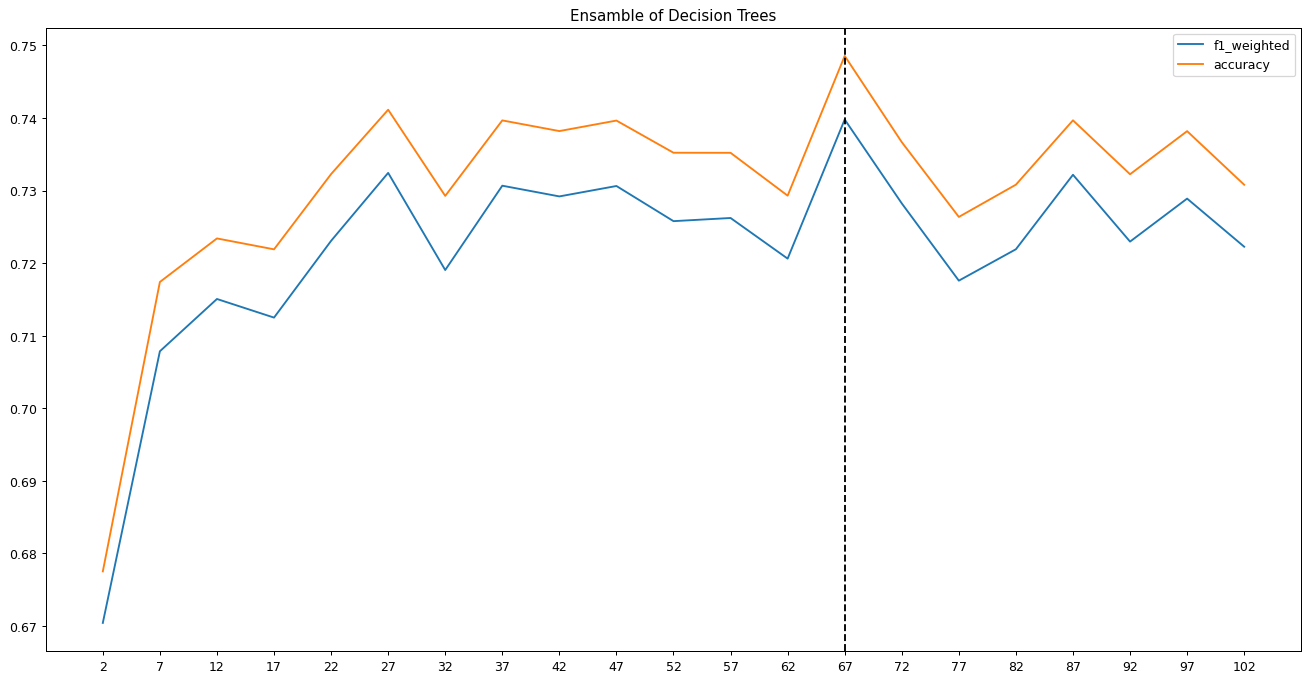

In [142]:
best_param_bagging_dt = grid_cv_dt.param_grid['n_estimators'][
    ((grid_cv_dt.cv_results_['mean_test_f1_weighted'] + grid_cv_dt.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv_dt.param_grid['n_estimators'], grid_cv_dt.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv_dt.param_grid['n_estimators'], grid_cv_dt.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv_dt.param_grid['n_estimators'])
plt.axvline(best_param_bagging_dt, linestyle='--', color='black')
plt.title('Ensamble of Decision Trees')
plt.legend()

Optimal number of estimators in bagging for decistion trees is 67.  
So, the accuracy and f1 metrics are increased with bagging relatively to the simple decision tree with the same hyperparameters.  


In [143]:
grid_cv_lr = GridSearchCV(estimator=lr_bag, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False, verbose=4)
grid_cv_lr.fit(X_train_lr, y_train_lr)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 1/5] END n_estimators=2; accuracy: (test=0.782) f1_weighted: (test=0.781) total time=   2.9s
[CV 2/5] END n_estimators=2; accuracy: (test=0.767) f1_weighted: (test=0.764) total time=   0.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 3/5] END n_estimators=2; accuracy: (test=0.795) f1_weighted: (test=0.790) total time=   0.0s
[CV 4/5] END n_estimators=2; accuracy: (test=0.826) f1_weighted: (test=0.824) total time=   0.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 5/5] END n_estimators=2; accuracy: (test=0.735) f1_weighted: (test=0.733) total time=   0.1s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 1/5] END n_estimators=7; accuracy: (test=0.789) f1_weighted: (test=0.787) total time=   6.0s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 2/5] END n_estimators=7; accuracy: (test=0.789) f1_weighted: (test=0.786) total time=   0.3s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 3/5] END n_estimators=7; accuracy: (test=0.780) f1_weighted: (test=0.775) total time=   0.3s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 4/5] END n_estimators=7; accuracy: (test=0.818) f1_weighted: (test=0.816) total time=   0.3s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 5/5] END n_estimators=7; accuracy: (test=0.742) f1_weighted: (test=0.742) total time=   0.3s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 1/5] END n_estimators=12; accuracy: (test=0.782) f1_weighted: (test=0.780) total time=   0.4s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 2/5] END n_estimators=12; accuracy: (test=0.805) f1_weighted: (test=0.804) total time=   0.3s
[CV 3/5] END n_estimators=12; accuracy: (test=0.803) f1_weighted: (test=0.798) total time=   0.4s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 4/5] END n_estimators=12; accuracy: (test=0.811) f1_weighted: (test=0.808) total time=   0.3s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 5/5] END n_estimators=12; accuracy: (test=0.750) f1_weighted: (test=0.748) total time=   0.3s
[CV 1/5] END n_estimators=17; accuracy: (test=0.797) f1_weighted: (test=0.796) total time=   0.5s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 2/5] END n_estimators=17; accuracy: (test=0.797) f1_weighted: (test=0.792) total time=   0.5s
[CV 3/5] END n_estimators=17; accuracy: (test=0.780) f1_weighted: (test=0.775) total time=   0.5s
[CV 4/5] END n_estimators=17; accuracy: (test=0.818) f1_weighted: (test=0.817) total time=   0.5s
[CV 5/5] END n_estimators=17; accuracy: (test=0.727) f1_weighted: (test=0.725) total time=   0.5s


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 1/5] END n_estimators=22; accuracy: (test=0.789) f1_weighted: (test=0.787) total time=   0.6s
[CV 2/5] END n_estimators=22; accuracy: (test=0.774) f1_weighted: (test=0.772) total time=   0.7s
[CV 3/5] END n_estimators=22; accuracy: (test=0.788) f1_weighted: (test=0.782) total time=   0.6s
[CV 4/5] END n_estimators=22; accuracy: (test=0.826) f1_weighted: (test=0.823) total time=   0.6s
[CV 5/5] END n_estimators=22; accuracy: (test=0.720) f1_weighted: (test=0.718) total time=   0.7s
[CV 1/5] END n_estimators=27; accuracy: (test=0.789) f1_weighted: (test=0.788) total time=   0.8s
[CV 2/5] END n_estimators=27; accuracy: (test=0.805) f1_weighted: (test=0.802) total time=   0.8s
[CV 3/5] END n_estimators=27; accuracy: (test=0.795) f1_weighted: (test=0.791) total time=   0.8s
[CV 4/5] END n_estimators=27; accuracy: (test=0.803) f1_weighted: (test=0.800) total time=   0.8s
[CV 5/5] END n_estimators=27; accuracy: (test=0.727) f1_weighted: (test=0.725) total time=   1.3s
[CV 1/5] END n_estim

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=LogisticRegression(C=10,
                                                                      multi_class='multinomial',
                                                                      penalty='l1',
                                                                      solver='saga',
                                                                      tol=0.001),
                                         max_features=14, n_jobs=-1,
                                         oob_score=True),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97, 102]},
             refit=False, scoring=['f1_weighted', 'accuracy'], verbose=4)

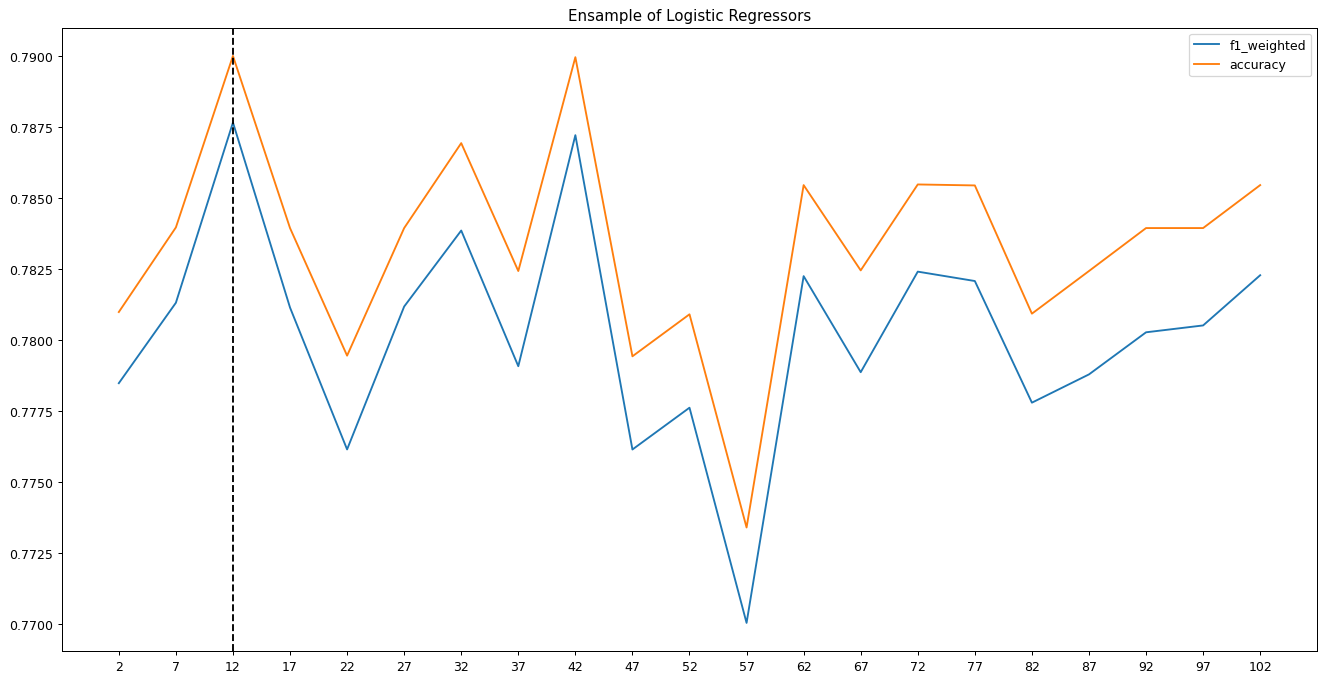

In [144]:
best_param_bagging_lr = grid_cv_lr.param_grid['n_estimators'][
    ((grid_cv_lr.cv_results_['mean_test_f1_weighted'] + grid_cv_lr.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv_lr.param_grid['n_estimators'], grid_cv_lr.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv_lr.param_grid['n_estimators'], grid_cv_lr.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv_lr.param_grid['n_estimators'])
plt.axvline(best_param_bagging_lr, linestyle='--', color='black')
plt.title('Ensample of Logistic Regressors')
plt.legend()

The optimal number of estimators in bagging with log_reg is 12.  
The accuracy and f1 metrics are increased relatively to the single log_reg estimator with the same hyperparameters.  

Hence base estimator should be simple, so ensamble of best decision trees is not the best ensamble.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [145]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

grid_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False)
grid_cv.fit(X_train_dt, y_train_dt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97, 102]},
             refit=False, scoring=['f1_weighted', 'accuracy'])

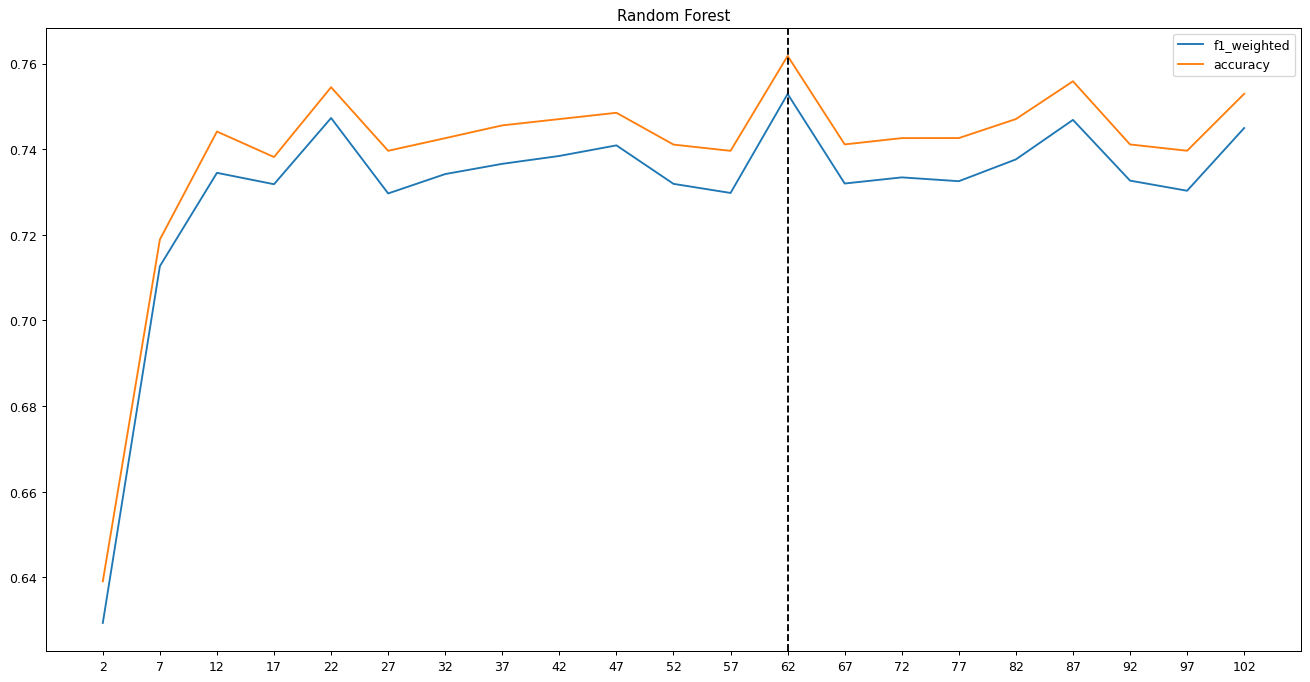

In [146]:
best_param_rf = grid_cv.param_grid['n_estimators'][
    ((grid_cv.cv_results_['mean_test_f1_weighted'] + grid_cv.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv.param_grid['n_estimators'], grid_cv.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv.param_grid['n_estimators'], grid_cv.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv.param_grid['n_estimators'])
plt.axvline(best_param_rf, linestyle='--', color='black')
plt.title('Random Forest')
plt.legend()

The optimal value is 62 (in boosting with dt it was 67) - it's quite similar, because the RFC ad boosting with DT are differs only features selection (RFC uses random subspace method - it takes sqrt number of features in each node).  
Worth noting, that f1 and accuracy metrics are increased w.r.t. bagging with DT. 

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [147]:
X_train_lr_splits = np.array_split(X_train_lr, 10, axis=0)
y_train_lr_splits = np.array_split(y_train_lr, 10, axis=0)
X_train_lr.shape

(662, 14)

In [148]:
for i in range(10):
     print(X_train_lr_splits[i].shape, y_train_lr_splits[i].shape)

(67, 14) (67,)
(67, 14) (67,)
(66, 14) (66,)
(66, 14) (66,)
(66, 14) (66,)
(66, 14) (66,)
(66, 14) (66,)
(66, 14) (66,)
(66, 14) (66,)
(66, 14) (66,)


In [149]:
X_train_dt_splits = np.array_split(X_train_dt, 10, axis=0)
y_train_dt_splits = np.array_split(y_train_dt, 10, axis=0)
X_train_dt.shape

(676, 18)

In [150]:
from sklearn.metrics import f1_score, accuracy_score

lr_metrics = np.zeros((10, 2))
dt_metrics = np.zeros((10, 2))
rfc_metrics = np.zeros((10, 2))

for i in range(10):
    lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, C=10, class_weight=None, penalty='l1')
    dt = DecisionTreeClassifier(max_depth=6)
    rfc = RandomForestClassifier(n_estimators=87)
    
    lr.fit(X_train_lr_splits[i], y_train_lr_splits[i])
    dt.fit(X_train_dt_splits[i], y_train_dt_splits[i])
    rfc.fit(X_train_dt_splits[i], y_train_dt_splits[i])
    
    lr_pred = lr.predict(X_test_lr)
    dt_pred = dt.predict(X_test_dt)
    rfc_pred = rfc.predict(X_test_dt)
    
    lr_metrics[i] = [f1_score(y_test_lr, lr_pred, average='weighted'), accuracy_score(y_test_lr, lr_pred)]
    dt_metrics[i] = [f1_score(y_test_dt, dt_pred, average='weighted'), accuracy_score(y_test_dt, dt_pred)]
    rfc_metrics[i] = [f1_score(y_test_dt, rfc_pred, average='weighted'), accuracy_score(y_test_dt, rfc_pred)]

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

In [151]:
x_ticks_lr = np.zeros(10)
x_ticks_lr[0] = X_train_lr_splits[0].shape[0]
for i in range(1, 10):
    x_ticks_lr[i] = X_train_lr_splits[i].shape[0] + x_ticks_lr[i-1]

x_ticks_dt_rfc = np.zeros(10)
x_ticks_dt_rfc[0] = X_train_dt_splits[0].shape[0]
for i in range(1, 10):
    x_ticks_dt_rfc[i] = X_train_dt_splits[i].shape[0] + x_ticks_dt_rfc[i-1]

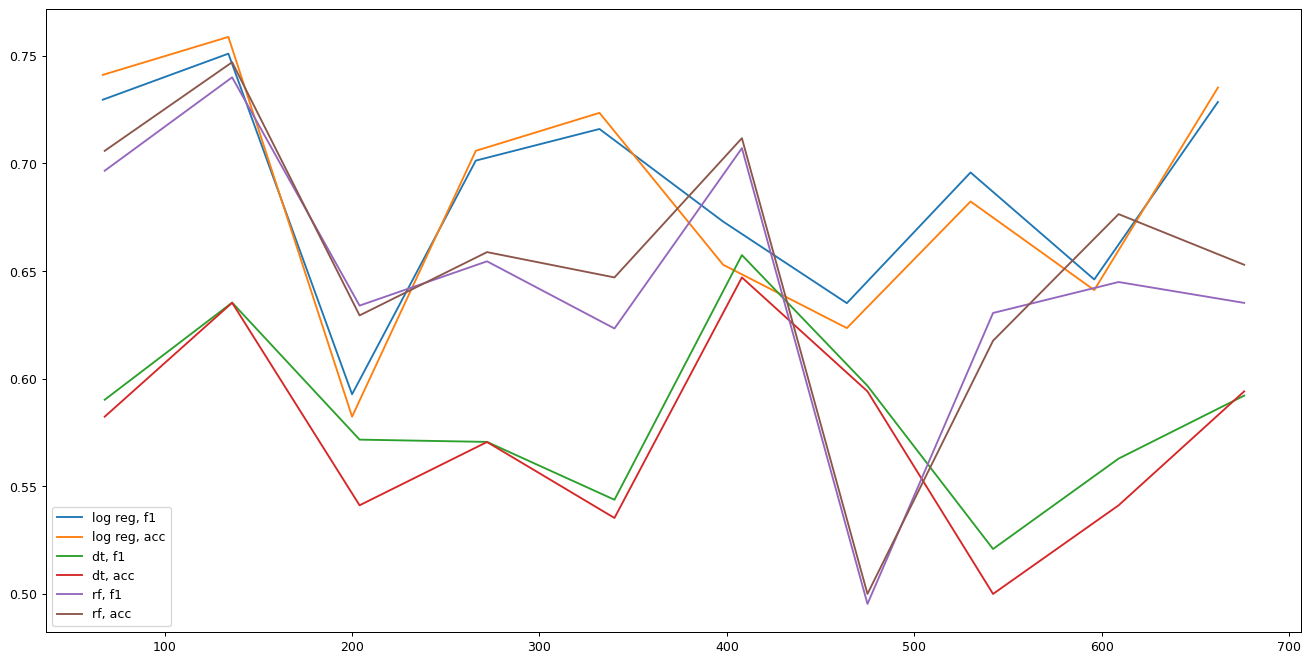

In [152]:
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(x_ticks_lr, lr_metrics[:, 0], label = "log reg, f1")
plt.plot(x_ticks_lr, lr_metrics[:, 1], label = "log reg, acc")

plt.plot(x_ticks_dt_rfc, dt_metrics[:, 0], label = "dt, f1")
plt.plot(x_ticks_dt_rfc, dt_metrics[:, 1], label = "dt, acc")

plt.plot(x_ticks_dt_rfc, rfc_metrics[:, 0], label = "rf, f1")
plt.plot(x_ticks_dt_rfc, rfc_metrics[:, 1], label = "rf, acc")
plt.legend()